In [2]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv('data_basics.tsv',delimiter='\t')

In [38]:
data_df.titleType.value_counts()

tvEpisode       4090166
short            684800
movie            519282
video            231645
tvSeries         165625
tvMovie          124605
tvMiniSeries      26194
videoGame         23507
tvSpecial         19290
tvShort            9848
Name: titleType, dtype: int64

In [49]:
s = pd.Series(data_df.primaryTitle.str.contains('Family Feud',regex=False,case=False,na=False),name='bools')

In [50]:
data_df[s.values][data_df[s.values].titleType == 'tvEpisode']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
326408,tt0340107,tvEpisode,Family Feud,Family Feud,0,2002,\N,120,"Biography,Documentary"
490260,tt0509464,tvEpisode,Family Feud,Family Feud,0,1998,\N,44,Drama
493848,tt0513093,tvEpisode,Family Feud,Family Feud,0,1979,\N,\N,Comedy
556590,tt0576895,tvEpisode,Grammy Family Feud,Grammy Family Feud,0,1989,\N,\N,Game-Show
592339,tt0613045,tvEpisode,Family Feud,Family Feud,0,1986,\N,\N,Comedy
594008,tt0614741,tvEpisode,Foxworthy Family Feud,Foxworthy Family Feud,0,1995,\N,30,"Comedy,Family"
619511,tt0640556,tvEpisode,Family Feud,Family Feud,0,1983,\N,\N,Comedy
630329,tt0651473,tvEpisode,The Family Feud,The Family Feud,0,1994,\N,\N,Comedy
636033,tt0657230,tvEpisode,A Fine Family Feud,A Fine Family Feud,0,1995,\N,30,"Comedy,Family,Romance"
637887,tt0659127,tvEpisode,Addams Family Feud,Addams Family Feud,0,1999,\N,\N,"Comedy,Family,Horror"


In [3]:
cluster_data = pq.read_table("./Clusterdata.parquet")
cluster_data_df = cluster_data.to_pandas()
cluster_data_df.replace("NULL", np.nan,inplace=True)
cluster_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324370 entries, 0 to 324369
Data columns (total 14 columns):
SK_DEVICE_ID         324370 non-null int64
11_DURATION          324370 non-null int64
44_DURATION          324370 non-null int64
15_DURATION          324370 non-null int64
52_DURATION          324370 non-null int64
12_DURATION          324370 non-null int64
16_DURATION          324370 non-null int64
21_DURATION          324370 non-null int64
17_DURATION          324370 non-null int64
28_DURATION          324370 non-null int64
54_DURATION          324370 non-null int64
45_DURATION          324370 non-null int64
23_DURATION          324370 non-null int64
ALL_ELSE_DURATION    324370 non-null int64
dtypes: int64(14)
memory usage: 34.6 MB


In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [5]:
cluster_data_df.set_index("SK_DEVICE_ID",inplace=True)
cluster_data_df.head()

,11_DURATION,44_DURATION,15_DURATION,52_DURATION,12_DURATION,16_DURATION,21_DURATION,17_DURATION,28_DURATION,54_DURATION,45_DURATION,23_DURATION,ALL_ELSE_DURATION
SK_DEVICE_ID,,,,,,,,,,,,,
5073031,9967,38463,255765,15450,1109,41252,0,0,1494,0,0,0,72091
5480631,0,362352,21438,9104,37604,66074,9000,0,4591,0,0,0,117800
5097831,11216,50249,14419,1869,7224,55134,0,0,0,0,9000,21155,150324
5394231,0,429700,54232,27250,54007,180770,0,0,47347,0,0,22875,124362
5100831,0,45204,15060,9000,0,9000,0,0,117733,521,0,0,16288


In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(cluster_data_df)

/Users/krishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krishna/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [112]:
# Create k-mean object
clt = KMeans(n_clusters=8, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(X_std)

In [113]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [121]:
user_cluster_analysis = pd.DataFrame({'MaxCategory' : cluster_data_df.idxmax(axis=1),'Labels' : model.labels_})
# user_cluster_analysis.groupby(["Labels","MaxCategory"]).count()
user_cluster_analysis.reset_index(inplace=True)
user_df = user_cluster_analysis.groupby(['Labels','MaxCategory']).count().reset_index()
user_df.sort_values(['SK_DEVICE_ID','MaxCategory'],ascending=False).groupby(['Labels']).head(2).sort_values(['Labels','SK_DEVICE_ID'],ascending=False)

,Labels,MaxCategory,SK_DEVICE_ID
79,7,11_DURATION,4162
80,7,12_DURATION,2268
74,6,23_DURATION,1483
76,6,44_DURATION,61
66,5,45_DURATION,164
60,5,15_DURATION,27
52,4,17_DURATION,487
48,4,11_DURATION,298
45,3,44_DURATION,14240
40,3,15_DURATION,8651


In [84]:
model.cluster_centers_

array([[-1.28464374e-01, -3.30503580e-01, -2.37248052e-01,
        -1.35787499e-01, -2.09026290e-01, -3.30055810e-01,
        -1.95331490e-01, -7.99661964e-02, -1.98411503e-01,
        -1.44875714e-01, -4.34467363e-02, -1.34491985e-01,
        -4.12790078e-01],
       [-7.64652794e-03,  3.10752535e-01,  2.43483247e-01,
         8.14086855e-01,  1.24350130e-01,  2.17968754e-01,
         3.18893334e-01, -5.10890878e-02,  2.33461848e-01,
         9.37225352e-02,  5.42228742e-02,  1.04293798e+01,
         3.94481907e-01],
       [-3.60440277e-02,  4.91323732e-01,  3.20149730e-01,
         1.76766464e-01,  2.85994719e-01,  6.57270307e-01,
         2.13527068e-01,  1.01472446e-02,  1.50668757e-01,
         5.53354066e+00,  1.61041555e-02,  1.54677904e-01,
         6.01800219e-01],
       [-7.88762257e-03,  8.78180884e-01,  7.36195193e-01,
         3.82910973e-01,  4.52364324e-01,  1.02976372e+00,
         5.28679751e-02, -1.84105312e-02,  1.93843554e-01,
        -7.46867906e-02,  3.66209200e

In [14]:
cluster_range = range( 2, 15 )
cluster_errors = []

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform( cluster_data_df ))

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_)
    clust_labels = clusters.predict(X_scaled)
    X_scaled.insert((X_scaled.shape[1]),'kmeans'+str(num_clusters),pd.DataFrame(clust_labels))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

/Users/krishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krishna/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,num_clusters,cluster_errors
0,2,3.671508e+06
1,3,3.423072e+06
2,4,3.226459e+06
3,5,3.061981e+06
4,6,2.897825e+06
5,7,2.772788e+06
6,8,2.613843e+06
7,9,2.490447e+06
8,10,2.322624e+06
9,11,2.215286e+06


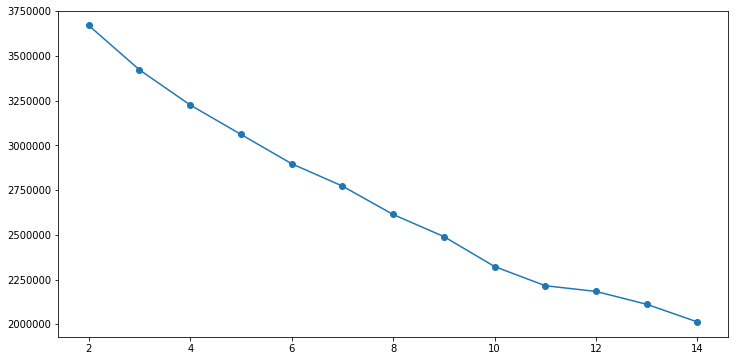

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [76]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


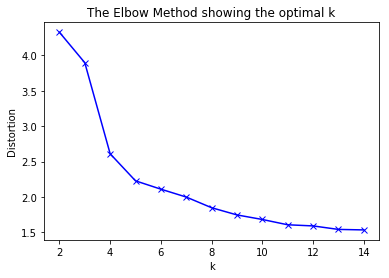

In [77]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
# Create k-mean object
clt = KMeans(n_clusters=4, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(X_std)

In [36]:
model.cluster_centers_[0]

array([-0.12604398, -0.31239578, -0.21783481, -0.12606392, -0.19161013,
       -0.30042838, -0.19025884, -0.07860924, -0.19847078, -0.10920769,
       -0.0417526 , -0.12792052, -0.38496667])

In [35]:
# cdist(X_std[0,:], model.cluster_centers_[0], 'euclidean')
X_std[0,:]

array([-0.07462605, -0.02988651,  3.08769157,  0.33281876, -0.3802724 ,
        0.89744906, -0.30664805, -0.12719339, -0.3097858 , -0.16353717,
       -0.08120509, -0.22820819,  0.64622945])

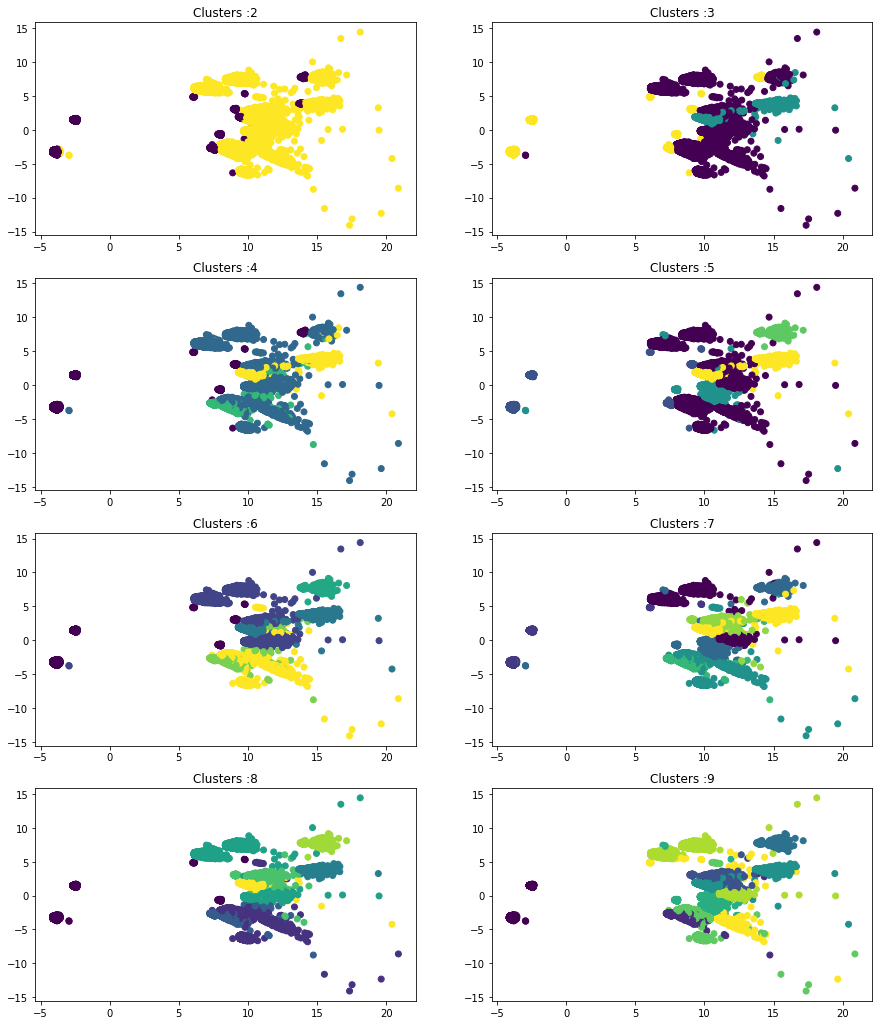

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)

fig = plt.figure(figsize=(15,18))
for i in cluster_range[:8]:
    ax = fig.add_subplot(4,2,i-1)
    ax.scatter(pca_2d[:, 0], pca_2d[:, 1], c=X_scaled['kmeans'+str(i)])
    ax.set_title("Clusters :"+str(i))